# Stack Overflow Topic Search

Created: 15 Dec 2021  
Last edited: 16 Dec 2021

## Setup to use this notebook

1. Set up your Python environment.

```
# create a new conda env called "topic"
conda create --name topic
conda activate topic

# install packages
conda install -c anaconda pyyaml pandas nltk gensim
conda install -c conda-forge jupyterlab jira wordcloud matplotlib spacy
pip install stackapi
```

2. Request access to the teams Stack Overflow by registering a new app on Stack Apps.

  Follow the instructions on [Stack Overflow for Teams API](https://stackoverflow.help/en/articles/4385859-stack-overflow-for-teams-api). Use `stackexchange.com` for the OAuth domain ([source](https://stackapps.com/a/7858)) and for the application website (where users go to read about the application).

## References
* Stack Exchange's [API reference docs](https://api.stackexchange.com/docs/)

In [59]:
import json
import pickle
import re
import requests

import gensim
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# do this one time only
#import nltk
#nltk.download('stopwords')
#spacy.cli.download("en_core_web_sm")

In [2]:
BASE_URL = "https://api.stackexchange.com/2.3"
TEAM_NAME = "imply"
APP_KEY = "xxx"
ACCESS_TOKEN = "xxx"

headers = {
  'X-API-Access-Token': ACCESS_TOKEN,
}

## Run a test request to check the connection

In [ ]:
url = f"{BASE_URL}/questions?order=desc&sort=activity&site=stackoverflow&team=stackoverflow.com%2fc%2f{TEAM_NAME}&key={APP_KEY}"
response = requests.request("GET", url, headers=headers)
pretty_json = json.loads(response.text)
print(json.dumps(pretty_json, indent=2))

## View a single search result

In [4]:
url = f"{BASE_URL}/search/excerpts?order=desc&sort=activity&body=sql&site=stackoverflow&team=stackoverflow.com%2fc%2f{TEAM_NAME}&key={APP_KEY}"
response = requests.request("GET", url, headers=headers)
#print(response.text)

data = response.json()
print(data["has_more"])
data["items"][0]["body"]

True


'The number of segments scanned is zero for some queries in clarity.\nFound an article related to the issue - https://support.imply.io/hc/en-us/articles/360015272314-Why-am-I-getting-0-segments-s\\[%E2%80%A6\\]hin-Clarity-on-some-of-my-queries-that-I-run-on-Imply-Cloud-\nQuestions:\nAs per the article, query ID goes through a selection process - Is it a SQL query ID or native query ID?\nWhat is the percentage of the queries which do get full information?\nCan the percentage be changed?\nIs this dependent on load, or is this a fixed percentage?\n'

## Collect search results in a list

In [5]:
page = 0
#custom_page_limit = 10

url = f"{BASE_URL}/search/excerpts?order=desc&sort=activity&body=sql&site=stackoverflow&team=stackoverflow.com%2fc%2f{TEAM_NAME}&key={APP_KEY}#page={page}"

result_bodies = []

"""
WARNING: I don't think this while is properly triggered, need to fix
"""

keep_going = True
while keep_going:
#    if page == custom_page_limit:
#        break
    
    # increment page number of results
    page += 1
    if page%10 == 0:
        print(f"On page {page}")
    
    # make request
    response = requests.request("GET", url, headers=headers)
    data = response.json()
    
    # extract results, mydata is a list of dicts
    mydata = data["items"]
    for mydict in mydata:
        result_bodies.append(mydict["body"])
    
    keep_going = data["has_more"]

On page 10
On page 20
On page 30
On page 40
On page 50
On page 60
On page 70
On page 80
On page 90
On page 100
On page 110
On page 120
On page 130
On page 140
On page 150
On page 160
On page 170
On page 180
On page 190
On page 200
On page 210
On page 220
On page 230
On page 240
On page 250
On page 260
On page 270
On page 280
On page 290
On page 300
On page 310
On page 320
On page 330
On page 340
On page 350
On page 360
On page 370
On page 380
On page 390
On page 400
On page 410
On page 420
On page 430
On page 440
On page 450
On page 460
On page 470
On page 480
On page 490
On page 500
On page 510
On page 520
On page 530
On page 540
On page 550
On page 560
On page 570
On page 580
On page 590
On page 600
On page 610
On page 620
On page 630
On page 640
On page 650
On page 660
On page 670
On page 680
On page 690
On page 700
On page 710
On page 720
On page 730
On page 740
On page 750
On page 760
On page 770
On page 780
On page 790
On page 800
On page 810
On page 820
On page 830
On page 840
O

On page 6400
On page 6410
On page 6420
On page 6430
On page 6440
On page 6450
On page 6460
On page 6470
On page 6480
On page 6490
On page 6500
On page 6510
On page 6520
On page 6530
On page 6540
On page 6550
On page 6560
On page 6570
On page 6580
On page 6590
On page 6600
On page 6610
On page 6620
On page 6630
On page 6640
On page 6650
On page 6660
On page 6670
On page 6680
On page 6690
On page 6700
On page 6710
On page 6720
On page 6730
On page 6740
On page 6750
On page 6760
On page 6770
On page 6780
On page 6790
On page 6800
On page 6810
On page 6820
On page 6830
On page 6840
On page 6850
On page 6860
On page 6870
On page 6880
On page 6890
On page 6900
On page 6910
On page 6920
On page 6930
On page 6940
On page 6950
On page 6960
On page 6970
On page 6980
On page 6990
On page 7000
On page 7010
On page 7020
On page 7030
On page 7040
On page 7050
On page 7060
On page 7070
On page 7080
On page 7090
On page 7100
On page 7110
On page 7120
On page 7130
On page 7140
On page 7150
On page 7160

On page 12510
On page 12520
On page 12530
On page 12540
On page 12550
On page 12560
On page 12570
On page 12580
On page 12590
On page 12600
On page 12610
On page 12620
On page 12630
On page 12640
On page 12650
On page 12660
On page 12670
On page 12680
On page 12690
On page 12700
On page 12710
On page 12720
On page 12730
On page 12740
On page 12750
On page 12760
On page 12770
On page 12780
On page 12790
On page 12800
On page 12810
On page 12820
On page 12830
On page 12840
On page 12850
On page 12860
On page 12870
On page 12880
On page 12890
On page 12900
On page 12910
On page 12920
On page 12930
On page 12940
On page 12950
On page 12960
On page 12970
On page 12980
On page 12990
On page 13000
On page 13010
On page 13020
On page 13030
On page 13040
On page 13050
On page 13060
On page 13070
On page 13080
On page 13090
On page 13100
On page 13110
On page 13120
On page 13130
On page 13140
On page 13150
On page 13160
On page 13170
On page 13180
On page 13190
On page 13200
On page 13210
On pag

On page 18370
On page 18380
On page 18390
On page 18400
On page 18410
On page 18420
On page 18430
On page 18440
On page 18450
On page 18460
On page 18470
On page 18480
On page 18490
On page 18500
On page 18510
On page 18520
On page 18530
On page 18540
On page 18550
On page 18560
On page 18570
On page 18580
On page 18590
On page 18600
On page 18610
On page 18620
On page 18630
On page 18640
On page 18650
On page 18660
On page 18670
On page 18680
On page 18690
On page 18700
On page 18710
On page 18720
On page 18730
On page 18740
On page 18750
On page 18760
On page 18770
On page 18780
On page 18790
On page 18800
On page 18810
On page 18820
On page 18830
On page 18840
On page 18850
On page 18860
On page 18870
On page 18880
On page 18890
On page 18900
On page 18910
On page 18920
On page 18930
On page 18940
On page 18950
On page 18960
On page 18970
On page 18980
On page 18990
On page 19000
On page 19010
On page 19020
On page 19030
On page 19040
On page 19050
On page 19060
On page 19070
On pag

On page 24230
On page 24240
On page 24250
On page 24260
On page 24270
On page 24280
On page 24290
On page 24300
On page 24310
On page 24320
On page 24330
On page 24340
On page 24350
On page 24360
On page 24370
On page 24380
On page 24390
On page 24400
On page 24410
On page 24420
On page 24430
On page 24440
On page 24450
On page 24460
On page 24470
On page 24480
On page 24490
On page 24500
On page 24510
On page 24520
On page 24530
On page 24540
On page 24550
On page 24560
On page 24570
On page 24580
On page 24590
On page 24600
On page 24610
On page 24620
On page 24630
On page 24640
On page 24650
On page 24660
On page 24670
On page 24680
On page 24690
On page 24700
On page 24710
On page 24720
On page 24730
On page 24740
On page 24750
On page 24760
On page 24770
On page 24780
On page 24790
On page 24800
On page 24810
On page 24820
On page 24830
On page 24840
On page 24850
On page 24860
On page 24870
On page 24880
On page 24890
On page 24900
On page 24910
On page 24920
On page 24930
On pag

On page 30090
On page 30100
On page 30110
On page 30120
On page 30130
On page 30140
On page 30150
On page 30160
On page 30170
On page 30180
On page 30190
On page 30200
On page 30210
On page 30220
On page 30230
On page 30240
On page 30250
On page 30260
On page 30270
On page 30280
On page 30290
On page 30300
On page 30310
On page 30320
On page 30330
On page 30340
On page 30350
On page 30360
On page 30370
On page 30380
On page 30390
On page 30400
On page 30410
On page 30420
On page 30430
On page 30440
On page 30450
On page 30460
On page 30470
On page 30480
On page 30490
On page 30500
On page 30510
On page 30520
On page 30530
On page 30540
On page 30550
On page 30560
On page 30570
On page 30580
On page 30590
On page 30600
On page 30610
On page 30620
On page 30630
On page 30640
On page 30650
On page 30660
On page 30670
On page 30680
On page 30690
On page 30700
On page 30710
On page 30720
On page 30730
On page 30740
On page 30750
On page 30760
On page 30770
On page 30780
On page 30790
On pag

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
print(page)
len(result_bodies)

33215


996420

In [28]:
# save result to, or read results from disk

#pickle.dump( result_bodies, open( "save.pickle", "wb" ) )

full_result_bodies = pickle.load( open( "save.pickle", "rb" ) )

In [48]:
#for i, x in enumerate(result_bodies):
#    print(i, x)

# truncate the result_bodies from the messed up while loop
result_bodies = full_result_bodies[:30]
result_bodies

['The number of segments scanned is zero for some queries in clarity.\nFound an article related to the issue - https://support.imply.io/hc/en-us/articles/360015272314-Why-am-I-getting-0-segments-s\\[%E2%80%A6\\]hin-Clarity-on-some-of-my-queries-that-I-run-on-Imply-Cloud-\nQuestions:\nAs per the article, query ID goes through a selection process - Is it a SQL query ID or native query ID?\nWhat is the percentage of the queries which do get full information?\nCan the percentage be changed?\nIs this dependent on load, or is this a fixed percentage?\n',
 'I am trying to submit an async SQL query but I get a 405 status and no query running:\n\nWhat am I doing wrong?\nThis is using Imply 2021.11 on GKE enhanced, and I am using  instead of a properly set up ingress. (due to customer constraints)\n',
 'Just to add what Vaibhav said, you can go through  https://github.com/implydata/druid/blob/master/imply-sql-async/README.md which has all the configs which need to be set.\n',
 'In case this help

In [45]:
# define stop words to ignore
custom_words = ["sql", "query", "use", "time", "druid", "imply", "quot", "datum", "try", "run", "want", "function", "fail", "pivot", "table"]
ENGLISH_STOP_WORDS = set( stopwords.words('english') ).union(custom_words)


def remove_URL(sample):
    """Remove URLs from a sample string
    https://gist.github.com/MrEliptik/b3f16179aa2f530781ef8ca9a16499af"""
    return re.sub(r"http\S+", "", sample)

def tokenize(sentence):
    gen = gensim.utils.simple_preprocess(sentence, deacc=True)
    return ' '.join(gen)

def remove_stopwords(text):
    text_list = text.split()
    filtered_sentence = [w for w in text_list if not w in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_sentence)

def lemmatize(nlp, text):
    # remove URLs
    text = remove_URL(text)
    
    # parse sentence using spacy
    # https://spacy.io/usage/spacy-101#pipelines
    doc = nlp(text) 
  
    # convert words into their simplest form (singular, present form, etc.)
    lemma = []
    for token in doc:
        if (token.lemma_ not in ['-PRON-']):
            lemma.append(token.lemma_)
    
    # lowercase, tokenize, rejoin
    token_text = tokenize(' '.join(lemma))
    
    # remove stopwords
    go_text = remove_stopwords(token_text)
          
    return go_text

In [46]:
# convert words to basic forms by lemmatizing
nlp = spacy.load("en_core_web_sm", disable=['ner'])
result_bodies = [lemmatize(nlp, x) for x in result_bodies]

# aggregate all records into one large string
large_string = ' '.join(result_bodies)
print(large_string[:100])

number segment scan zero clarity find article relate issue question per article go selection process


## Visualize term frequencies

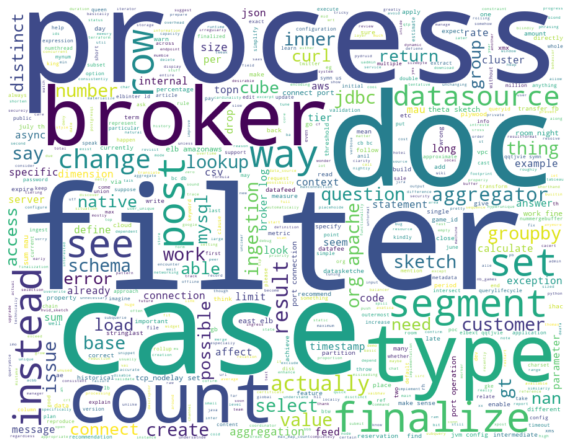

In [47]:
# apply stop words and run wordcloud on term frequency
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=900, 
    height=700, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(10,10))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

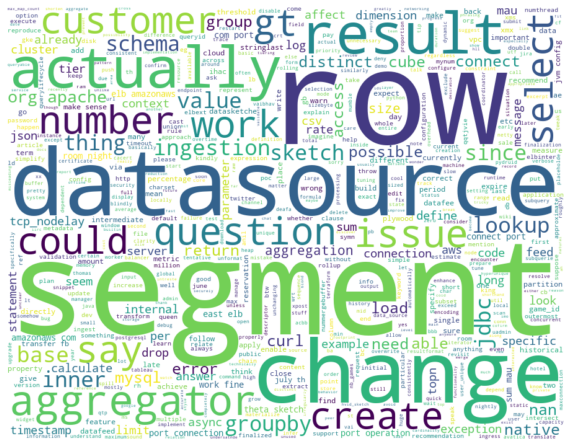

In [56]:
# apply stop words and run wordcloud on term frequency
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=900, 
    height=700, 
    contour_width=3, 
    contour_color='steelblue',
    stopwords=ENGLISH_STOP_WORDS.union(["case", "doc", "filter", "process", "get", "would", "like", "also", "type", "broker", "count", "instead", "finalize", "see", "post", "way", "set"]),
)

# display our wordcloud across all records
plt.figure(figsize=(10,10))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Determine most frequent bigrams

In [60]:
# https://www.nltk.org/howto/collocations.html
# tokenize string then analyze bigrams
tokens = gensim.utils.simple_preprocess(large_string, deacc=True)
pairs = nltk.bigrams(tokens)

# construct a BigramCollocationFinder for all bigrams in the given sequence
# it's a tool for the finding and ranking bigram collocations
finder = nltk.collocations.BigramCollocationFinder.from_words(pairs)

# ignore all bigrams which occur less than three times in the corpus
finder.apply_freq_filter(3)

# list top ten bigram collocations, as measured using Pointwise Mutual Information
bigram_measures = nltk.collocations.BigramAssocMeasures()
words = finder.nbest(bigram_measures.pmi, 10)

d = sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]
d

[((('amazonaws', 'com'), ('com', 'port')), 4),
 ((('east', 'elb'), ('elb', 'amazonaws')), 4),
 ((('elb', 'amazonaws'), ('amazonaws', 'com')), 4),
 ((('sum', 'mau'), ('mau', 'gt')), 3)]

Text(0.5, 0, '# of Occurences')

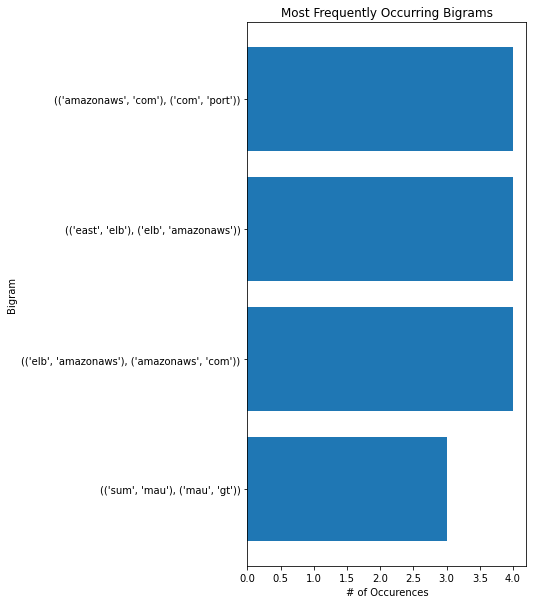

In [61]:
# visualize the bigram frequencies

wordlabels = list(zip(*reversed(d)))[0]
frequency = list(zip(*reversed(d)))[1]
x_pos = range(len(wordlabels)) 

plt.figure(figsize=(5,10))
plt.barh(x_pos, frequency, align='center')
plt.yticks(x_pos, wordlabels) 

plt.title('Most Frequently Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')